# Softmax Regression

Softmax에 대한 자세한 설명은 제 Notion 페이지에 있습니다.

https://noversezero.notion.site/Softmax-Regression-443d6bf93b234f11a3e6134130953d7b

In [8]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [9]:
# mnist 데이터 로딩 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

 mnist 데이터는 6만개의 train 데이터와 1만개의 test 데이터로 이루어져있습니다.
 
 한개의 데이터는 28, 28의 2차원 배열 형태로 저장이 되어 있습니다.
 
 즉, 가로 28, 세로 28의 흑백 이미지들의 집합입니다.

In [10]:
# Covert uint8 to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

In [11]:
# Flatten images to 1-0 vector of 784 features (28*28), 1차원 벡터로 변환
x_train, x_test = x_train.reshape([-1, 28*28]), x_test.reshape([-1, 28*28])

reshape(-1, x)는 2차원이던 shape를 1차원으로 줄이라는 뜻이다.

즉, x_train.reshape([-1, 28x28])은 x_train의 모든 원소들을 28x28(왜냐 한 데이터가 28x28 차원이기 때문에)의 1차원 벡터로 바꾼다는 의미이다.

In [12]:
# Normalize images value from [0, 255] to [0,1] 
#0부터 255까지 숫자로 되어 있는 것을 255로 나누어서 Nomalization
x_train, x_test = x_train / 255, x_test / 255

이 데이터를 이해하기 휩게 0과 1사이의 실수값으로 데이터를 변환하는게 필요합니다.

255로 나누어 0과 1사이의 값으로 만들어 줍니다.

In [13]:
# One-Hot-Encoding
one_hot_y_train = np.eye(10)[y_train]
one_hot_y_test = np.eye(10)[y_test]

y_train과 y_test를 One Hot Encoding으로 만드는 것이다.

np.eye(n)은 nxn의 단위행렬을 만드는 것이다.

원래 np.eye(n)은 대각행렬에 1이 위치하지만, 뒤에 [y_test or train]을 통해 1이 위치하는 위치를 조정할 수 있다.

즉, 한 행에 1이 1개이고 나머지가 0인 One-Hot-Encoding이 된 것이다.

In [14]:
# batch_size을 정의하고, 학습
batch_size = 512

train_data = tf.data.Dataset.from_tensor_slices((x_train, one_hot_y_train))
#5000번 섞고, batch size만큼 뽑아서 학습
train_data = train_data.shuffle(5000).batch(batch_size).prefetch(1)
test_data = tf.data.Dataset.from_tensor_slices((x_test, one_hot_y_test))

tf.data.Dataset.from_tensor_slices()은 Dataset을 생성하는 함수이다.

우리는 로컬 파일이나 메모리에 올려져 있는 데이터를 모델로 집어 넣어 평가하고 연산하고 다양한 작업을 진행하게 된다.

이때 우리의 데이터가 일정 순서에 따라서 작업이 진행될 수 있도록 도와주는 것이다.

따라서 이를 파이프 라인 빌드라고 한다.

prefetch(1)은 Dataset이 항상 한 Batch가 미리 준비되어 있도록 준비해준다.

즉, 어떤 Batch가 모델에 들어가서 연산을 진행하고 있을때, 연산이 끝나면 바로 다른 하나의 Batch를 넣을 수 있도록 준비를 해놓는 것이다.

In [15]:
# model 정의
model = tf.keras.models.Sequential()
# Softmax를 이용하고 출력이 10개 0~9 중 한개의 값으로 예측
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

In [16]:
# SGD 방법으로 Optimizer를 사용하고, Cross-Entropy를 사용하여 Loss Function을 계산한다.
model.compile(optimizer='sgd', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [17]:
model.fit(train_data, epochs = 100)

Epoch 1/100
118/118 [==============================] - 1s 5ms/step - loss: 1.8535 - accuracy: 0.4797
Epoch 2/100
118/118 [==============================] - 1s 5ms/step - loss: 1.2873 - accuracy: 0.7439
Epoch 3/100
118/118 [==============================] - 1s 5ms/step - loss: 1.0262 - accuracy: 0.7964
Epoch 4/100
118/118 [==============================] - 1s 5ms/step - loss: 0.8825 - accuracy: 0.8189
Epoch 5/100
118/118 [==============================] - 1s 5ms/step - loss: 0.7917 - accuracy: 0.8314
Epoch 6/100
118/118 [==============================] - 1s 5ms/step - loss: 0.7287 - accuracy: 0.8394
Epoch 7/100
118/118 [==============================] - 1s 5ms/step - loss: 0.6822 - accuracy: 0.8455
Epoch 8/100
118/118 [==============================] - 1s 5ms/step - loss: 0.6462 - accuracy: 0.8504
Epoch 9/100
118/118 [==============================] - 1s 7ms/step - loss: 0.6175 - accuracy: 0.8541
Epoch 10/100
118/118 [==============================] - 1s 5ms/step - loss: 0.5939 - accura

118/118 [==============================] - 1s 5ms/step - loss: 0.3523 - accuracy: 0.9027
Epoch 82/100
118/118 [==============================] - 1s 5ms/step - loss: 0.3516 - accuracy: 0.9028
Epoch 83/100
118/118 [==============================] - 1s 5ms/step - loss: 0.3509 - accuracy: 0.9032
Epoch 84/100
118/118 [==============================] - 1s 5ms/step - loss: 0.3502 - accuracy: 0.9033
Epoch 85/100
118/118 [==============================] - 1s 5ms/step - loss: 0.3495 - accuracy: 0.9035
Epoch 86/100
118/118 [==============================] - 1s 5ms/step - loss: 0.3488 - accuracy: 0.9036
Epoch 87/100
118/118 [==============================] - 1s 5ms/step - loss: 0.3481 - accuracy: 0.9038
Epoch 88/100
118/118 [==============================] - 1s 9ms/step - loss: 0.3475 - accuracy: 0.9040
Epoch 89/100
118/118 [==============================] - 1s 6ms/step - loss: 0.3468 - accuracy: 0.9041
Epoch 90/100
118/118 [==============================] - 1s 5ms/step - loss: 0.3462 - accuracy: 

In [19]:
model.evaluate(x_test, one_hot_y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3249 - accuracy: 0.9113


[0.32487383484840393, 0.911300003528595]

predicted :  6


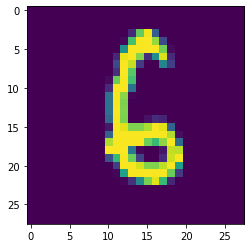

In [20]:
i = 4579
# 4579번째 그림을 출력
plt.imshow(x_test[i].reshape(28, 28))
print("predicted : ", np.argmax(model.predict(np.array([x_test[i]])), axis=1)[0])

predicted :  9


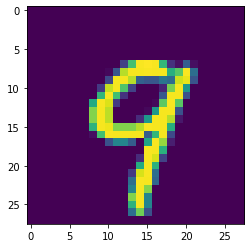

In [22]:
i = 12
# 4579번째 그림을 출력
plt.imshow(x_test[i].reshape(28, 28))
print("predicted : ", np.argmax(model.predict(np.array([x_test[i]])), axis=1)[0])

In [21]:
model.predict(np.array([x_test[i]]))

array([[1.06954933e-04, 2.31264465e-04, 1.04430810e-01, 3.83971055e-04,
        4.91999043e-03, 6.95372978e-03, 8.57234657e-01, 6.11936912e-06,
        2.56160628e-02, 1.16364514e-04]], dtype=float32)

지정한 영역에서 argmax는 최대값을 찾아주는 함수이다.

np.array([x_test[4579]])에서 가장 큰 수를 찾아서 해당 위치의 값을 print하는 것이다.